<center><font size="6"><b>Комп'ютерний практикум 4.

Препроцесінг даних</b></font></center>

##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP4.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

### Завдання №1

Завантажте дані з ресурсу

URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [1]:
# МІСЦЕ ДЛЯ КОДУ

import pandas as pd

URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

df = pd.read_csv(URL)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Завдання №2

* Виведіть інформацію про датасет, описову статистику для кількісних змінних та для якісних змінних

* побудуйте графік регресії для змінних `Survived` та `Pclass`


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top  

<AxesSubplot: xlabel='Survived', ylabel='Pclass'>

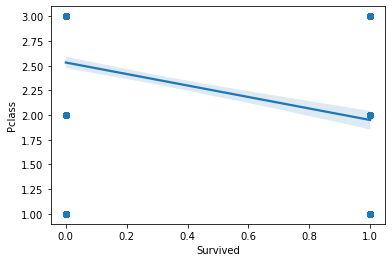

In [2]:
# МІСЦЕ ДЛЯ КОДУ

import seaborn as sns

# Виведіть інформацію про датасет, описову статистику для кількісних змінних та для якісних змінних
print(df.info())
print(df.describe(include='all'))

# побудуйте графік регресії для змінних Survived та Pclass
sns.regplot(x='Survived', y='Pclass', data=df)

### Завдання №3

* побудуйте `heatmap()` для візуального відображення пропущених значень
* для кількісної змінної поповніть пропущені дані середнім значенням
* для категоріальної змінної поповніть пропущені значення значенням, яке зустрічається найчастіше

NameError: name 'data' is not defined

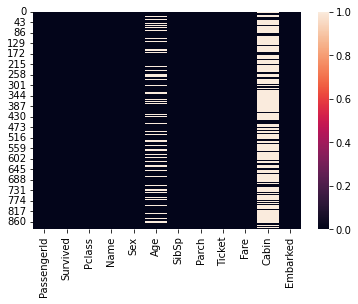

In [3]:
# МІСЦЕ ДЛЯ КОДУ

import numpy as np

# побудуйте heatmap() для візуального відображення пропущених значень
sns.heatmap(df.isnull())

# для кількісної змінної поповніть пропущені дані середнім значенням
df['Age'].fillna(value=data['Age'].mean(), inplace=True)

# для категоріальної змінної поповніть пропущені значення значенням, яке зустрічається найчастіше
df['Cabin'].fillna(value=df['Cabin'].mode()[0], inplace=True)


### Завдання №4

Оберіть 4 категоріальних змінних та закодуйте:
* Змінну_1 -  за допомогою функції `LabelEncoder()`
* Змінну_2 -  за допомогою функції `get_dummies()`
* Змінну_3 -  за допомогою функції `OneHotEncoder()`
* Змінну_4 -  кількістю значень відповідної категорії


In [ ]:
# МІСЦЕ ДЛЯ КОДУ

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Змінна_1 - за допомогою функції LabelEncoder()
le = LabelEncoder()
df['Pclass_LabelEncoded'] = le.fit_transform(df['Pclass'])

# Змінна_2 - за допомогою функції get_dummies()
df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex')], axis=1)

# Змінна_3 - за допомогою функції OneHotEncoder()
ohe = OneHotEncoder()
ohe_result = ohe.fit_transform(df[['Cabin']])
ohe_df = pd.DataFrame(ohe_result.toarray(), columns=ohe.get_feature_names_out(['Cabin']))
df = pd.concat([df, ohe_df], axis=1)

# Змінна_4 - кількістю значень відповідної категорії
df['Embarked_Count'] = df['Embarked'].map(df['Embarked'].value_counts())


### Завдання №5
Поділіть на 4 вікові групи змінну `Age`

In [ ]:
# МІСЦЕ ДЛЯ КОДУ
bins = np.linspace(df['Age'].min(), df['Age'].max(), 5)
labels = ['Дитина', 'Молодший', 'Старший', 'Літній']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

### Завдання №6

* Створіть новий датафрейм з вихідного тільки із числових значень
* Застосуйте $MinMax$-Нормування даних та збережіть в новий датафрейм, виведіть описову статистику
* Застосуйте $Standart Scaling$ даних та збережіть в новий датафрейм, виведіть описову статистику
* Застосуйте $L_1$-Нормування та збережіть в новий датафрейм, виведіть описову статистику


In [ ]:
# МІСЦЕ ДЛЯ КОДУ

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# Створіть новий датафрейм з вихідного тільки із числових значень
df_numeric = df.select_dtypes(include=[np.number])

scaler = MinMaxScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
print(df_numeric_scaled.describe())

# ініціалізуємо StandardScaler, застосовуємо його до даних та виводимо описову статистику
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
print(df_numeric_scaled.describe())

# ініціалізуємо Normalizer з L1 нормою, застосовуємо його до даних та виводимо описову статистику
scaler = Normalizer(norm='l1')
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
print(df_numeric_scaled.describe())
